<a href="https://colab.research.google.com/github/Billy-24/my_mathematics_repo_temp/blob/main/fdeec17_xlsx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import io
uploaded = files.upload()
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


Saving fdeec17.csv to fdeec17.csv


In [ ]:
data = pd.read_csv(io.BytesIO(uploaded['fdeec17.csv']))
data.head(10)

,Unnamed: 0,ANNEE,TRIM,CATAU2010R,METRODOM,TYPMEN7,AGE3,AGE5,COURED,ENFRED,...,DIP11,CSTOTPRM,IDENTM,EXTRIAN,EMPNBH,HREC,HHCE,HPLUSA,JOURTR,NBTOTE
0,0,2017,1,1,1,2,50,50,2,1,...,30.0,52.0,1,263.388752,37.0,NaN,37.0,NaN,5.0,NaN
1,1,2017,1,1,1,2,15,15,2,2,...,42.0,52.0,1,263.388752,32.0,NaN,32.0,NaN,4.0,NaN
2,2,2017,1,1,1,2,15,15,2,2,...,31.0,52.0,1,263.388752,38.0,NaN,38.0,NaN,5.0,NaN
3,3,2017,3,1,1,2,50,50,2,1,...,30.0,52.0,2,176.893923,37.0,NaN,37.0,NaN,5.0,NaN
4,4,2017,3,1,1,2,15,15,2,2,...,42.0,52.0,2,176.893923,40.0,NaN,32.0,NaN,4.0,NaN
5,5,2017,3,1,1,2,15,15,2,2,...,31.0,52.0,2,176.893923,31.0,NaN,38.0,NaN,5.0,NaN
6,6,2017,1,1,1,4,50,50,1,1,...,71.0,72.0,3,155.471420,NaN,NaN,NaN,NaN,NaN,NaN
7,7,2017,1,1,1,4,50,60,1,1,...,50.0,72.0,3,155.471420,NaN,NaN,NaN,NaN,NaN,NaN
8,8,2017,1,1,1,4,15,15,2,2,...,31.0,72.0,3,155.471420,39.0,NaN,39.0,NaN,5.0,NaN
9,9,2017,3,1,1,4,50,60,1,1,...,71.0,72.0,4,148.130953,NaN,NaN,NaN,NaN,NaN,NaN


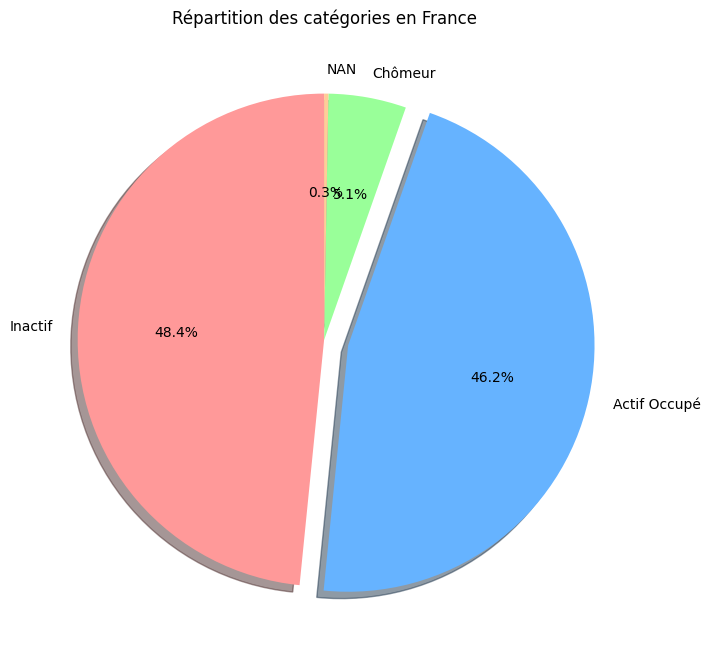

In [ ]:
# Remplacer les valeurs NaN par "NAN"
data['ACTEU'].fillna('NAN', inplace=True)

# Calculer les pourcentages
categories_count = data['ACTEU'].value_counts()
total_count = len(data)
pourcentages = (categories_count / total_count) * 100

# Définir les libellés dans le bon ordre
labels = ['Inactif', 'Actif Occupé', 'Chômeur', 'NAN']

# Personnaliser les couleurs et l'explosion des segments si nécessaire
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0, 0.1, 0, 0)

# Création du camembert
plt.figure(figsize=(8, 8))
plt.pie(pourcentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)

# Titre du camembert
plt.title('Répartition des catégories en France')

# Affichage du camembert
plt.show()


In [ ]:
# Remplacer les valeurs NaN par "NAN"
# Créer un dictionnaire de correspondance
correspondance = {
    1: 'Actif Occupé',
    2: 'Chômeur',
    3: 'Inactif',
 'nan': 'NAN'
}
# Appliquer la correspondance pour créer une nouvelle colonne
data['ACTEU_Label'] = data['ACTEU'].map(correspondance)

# Calculer les pourcentages
categories_count = data['ACTEU_Label'].value_counts()

# Définir les libellés dans le bon ordre
labels = ['Inactif', 'Chômeur', 'Actif Occupé','nan']

# Réorganiser les catégories_count en fonction de l'ordre des libellés
categories_count = categories_count.reindex(labels)

# Afficher les résultats
print(categories_count)








Inactif         207520.0
Chômeur          21864.0
Actif Occupé    198054.0
nan                  NaN
Name: ACTEU_Label, dtype: float64


In [ ]:
unique_categories = data['ACTEU'].unique()
print(unique_categories)

[1.0 3.0 2.0 'NAN']


In [ ]:
# Créer un dictionnaire de correspondance entre les numéros et les noms
label_mapping = {
 1: 'Actif Occupé',
    2: 'Chômeur',
    3: 'Inactif',
 'nan': 'NAN'
}

# Appliquer la correspondance aux données
data['ACTEU'] = data['ACTEU'].map(label_mapping)
# Compter les occurrences de chaque catégorie dans la colonne 'ACTEU6'
category_counts = data['ACTEU'].value_counts()

# Afficher le résultat sous forme de DataFrame
category_counts_df = pd.DataFrame({'Catégorie': category_counts.index, 'Nombre': category_counts.values})
category_counts_df = category_counts_df.set_index('Catégorie')
print(category_counts_df)

              Nombre
Catégorie           
Inactif       207520
Actif Occupé  198054
Chômeur        21864


In [ ]:
#Comptez les occurrences de chaque catégorie dans la colonne 'ACTEU6' en incluant les valeurs "NAN"
category_counts = data['ACTEU'].value_counts(dropna=False)

# Créez un DataFrame en incluant les valeurs "NAN"
category_counts_df = pd.DataFrame({'Catégorie': category_counts.index, 'Nombre': category_counts.values})
category_counts_df = category_counts_df.set_index('Catégorie')

# Affichez le DataFrame
print(category_counts_df)

              Nombre
Catégorie           
Inactif       207520
Actif Occupé  198054
Chômeur        21864
NaN             1204


In [ ]:

# Compter les occurrences de chaque catégorie dans la colonne 'ACTEU6'
category_counts = data['ACTEU6'].value_counts()

# Afficher le résultat sous forme de DataFrame
category_counts_df = pd.DataFrame({'Catégorie': category_counts.index, 'Nombre': category_counts.values})
category_counts_df = category_counts_df.set_index('Catégorie')
print(category_counts_df)

           Nombre
Catégorie        
1.0        198054
6.0        172921
5.0         34599
3.0         20854
4.0          1010


                                         Nombre
Catégorie                                      
Actif Occupé                             198054
Autres inactifs (dont retraité)          172921
Etudiant, élève, stagiaire en formation   34599
Chômeur PSERE                             20854
NaN                                        1204
Autre Chômeur BIT                          1010


In [ ]:
# Créer un dictionnaire de correspondance entre les numéros et les noms
label_mapping = {
1.0: 'Actif Occupé',
6.0: 'Autres inactifs (dont retraité)',
 5.0: 'Etudiant, élève, stagiaire en formation',
3.0: 'Chômeur PSERE',
4.0: 'Autre Chômeur BIT'
}

# Appliquer la correspondance aux données
data['ACTEU6'] = data['ACTEU6'].map(label_mapping)
# Compter les occurrences de chaque catégorie dans la colonne 'ACTEU6'
category_counts = data['ACTEU6'].value_counts()

# Afficher le résultat sous forme de DataFrame
category_counts_df = pd.DataFrame({'Catégorie': category_counts.index, 'Nombre': category_counts.values})
category_counts_df = category_counts_df.set_index('Catégorie')
print(category_counts_df)

                                         Nombre
Catégorie                                      
Actif Occupé                             198054
Autres inactifs (dont retraité)          172921
Etudiant, élève, stagiaire en formation   34599
Chômeur PSERE                             20854
Autre Chômeur BIT                          1010


In [ ]:
# Comptez les occurrences de chaque catégorie dans la colonne 'ACTEU6' en incluant les valeurs "NAN"
category_counts = data['ACTEU6'].value_counts(dropna=False)

# Créez un DataFrame en incluant les valeurs "NAN"
category_counts_df = pd.DataFrame({'Catégorie': category_counts.index, 'Nombre': category_counts.values})
category_counts_df = category_counts_df.set_index('Catégorie')

# Affichez le DataFrame
print(category_counts_df)

                                         Nombre
Catégorie                                      
Actif Occupé                             198054
Autres inactifs (dont retraité)          172921
Etudiant, élève, stagiaire en formation   34599
Chômeur PSERE                             20854
NaN                                        1204
Autre Chômeur BIT                          1010


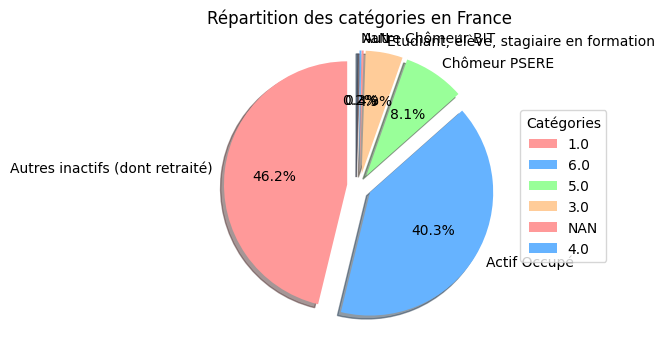

In [ ]:
# Remplacer les valeurs NaN par "NAN"
data['ACTEU6'].fillna('NAN', inplace=True)
# Calculer les pourcentages
categories_count = data['ACTEU6'].value_counts()
total_count = len(data)
pourcentages = (categories_count / total_count) * 100

# Définir les libellés dans le bon ordre
labels = ['Autres inactifs (dont retraité)', 'Actif Occupé', 'Chômeur PSERE ', "Etudiant, élève, stagiaire en formation", 'Autre Chômeur BIT', 'NaN']
# Personnaliser les couleurs et l'explosion des segments si nécessaire
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

# Création du camembert
plt.figure(figsize=(4, 4))
plt.pie(pourcentages, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)

# Titre du camembert
plt.title('Répartition des catégories en France')
# Légende
plt.legend(pourcentages.index, title="Catégories", loc="center left", bbox_to_anchor=(1, 0.5))
# Affichage du camembert
plt.show()

In [ ]:
unique_categories = data['ACTEU'].unique()
print(unique_categories)

[1.0 3.0 2.0 'NAN']


In [ ]:
# Remplacer les valeurs NaN par "NAN" dans la colonne 'ACTEU'
data['ACTEU'].fillna('NAN', inplace=True)

# Compter les occurrences de chaque catégorie dans la colonne 'ACTEU'
category_counts = data['ACTEU'].value_counts()

# Extraire le nombre de chômeurs
chomeurs = category_counts[2.0]  # Valeur numérique pour les chômeurs

# Extraire le nombre d'actifs occupés
actifs_occupes = category_counts[1.0]  # Valeur numérique pour les actifs occupés

# Extraire le nombre d'inactifs
inactifs = category_counts[3.0]  # Valeur numérique pour les inactifs

# Calculer le ratio chômeurs / actifs occupés
ratio_chomeurs_actifs = chomeurs / actifs_occupes

# Calculer le ratio chômeurs / (actifs occupés + inactifs)
ratio_chomeurs_total = chomeurs / (actifs_occupes + inactifs)

# Créer une liste de labels pour les catégories
categories = ['Chômeurs / Actifs Occupés', 'Chômeurs / (Actifs Occupés + Inactifs)']

# Créer une liste des ratios correspondants
ratios = [ratio_chomeurs_actifs, ratio_chomeurs_total]

print("Ratio Chômeurs / Actifs Occupés:", ratio_chomeurs_actifs)
print("Ratio Chômeurs / (Actifs Occupés + Inactifs):", ratio_chomeurs_total)

# Maintenant, vous pouvez utiliser ces ratios et labels pour créer votre graphique à barres empilées.


Ratio Chômeurs / Actifs Occupés: 0.11039413493289708
Ratio Chômeurs / (Actifs Occupés + Inactifs): 0.05390878113488537


Text(0.5, 1.0, 'Comparaison des Ratios Chômeurs')

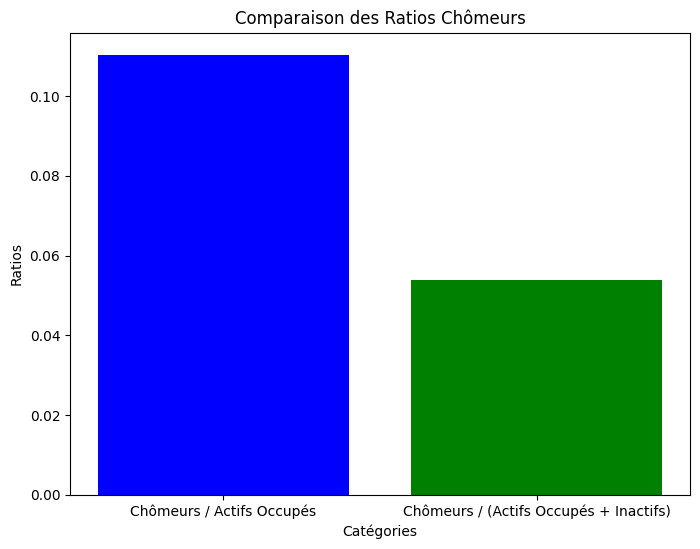

In [ ]:

# Création d'un graphique à barres empilées
plt.figure(figsize=(8, 6))
plt.bar(categories, ratios, color=['blue', 'green'])
plt.xlabel('Catégories')
plt.ylabel('Ratios')
plt.title('Comparaison des Ratios Chômeurs')


In [ ]:
# Remplacer les valeurs NaN par "NAN" dans la colonne 'ACTEU'
data['ACTEU'].fillna('NAN', inplace=True)

# Compter les occurrences de chaque catégorie dans la colonne 'ACTEU'
category_counts = data['ACTEU'].value_counts()

# Extraire le nombre de chômeurs
chomeurs = category_counts[2.0]  # Valeur numérique pour les chômeurs

# Extraire le nombre d'actifs occupés
actifs_occupes = category_counts[1.0]  # Valeur numérique pour les actifs occupés

# Extraire le nombre d'inactifs
inactifs = category_counts[3.0]  # Valeur numérique pour les inactifs

# Calculer le ratio chômeurs / actifs occupés
ratio_chomeurs_actifs = chomeurs / actifs_occupes

# Calculer le ratio chômeurs / (actifs occupés + inactifs)
ratio_chomeurs_total = chomeurs / (actifs_occupes + inactifs)

# Créer une liste de labels pour les catégories
categories = ['Chômeurs / Actifs Occupés', 'Chômeurs / (Actifs Occupés + Inactifs)']

# Créer une liste des ratios correspondants
ratios = [ratio_chomeurs_actifs, ratio_chomeurs_total]

print("Ratio Chômeurs / Actifs Occupés:", ratio_chomeurs_actifs)
print("Ratio Chômeurs / (Actifs Occupés + Inactifs):", ratio_chomeurs_total)

In [ ]:
# Appliquez la correspondance des libellés
label_mapping = {
    1: 'Actif Occupé',
    2: 'Chômeur',
    3: 'Inactif',
    'nan': 'NAN'
}
data['ACTEU'] = data['ACTEU'].map(label_mapping)

# Comptez le nombre d'actifs occupés
nombre_actifs_occupes = len(data[data['ACTEU'] == 'Actif Occupé'])

# Comptez le nombre total d'actifs (Actif Occupé + Chômeur)
nombre_actifs_total = len(data[(data['ACTEU'] == 'Actif Occupé') | (data['ACTEU'] == 'Chômeur')])

# Calculez le ratio des actifs
ratio_actifs = nombre_actifs_occupes / nombre_actifs_total

# Affichez le ratio des actifs
print("Ratio des Actifs Occupés :", ratio_actifs)


Ratio des Actifs Occupés : 0.9005811256923035
